<a href="https://colab.research.google.com/github/jafar-albadarneh/data-science-pot/blob/master/KNN_Classifier_using_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Nearest Neighbors Classifier using Scikit learn

In [0]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## Load Dataset (EDA, pre-processing, and prepperation)

### Load dataset

[**`Congressional Voting Records Data Set`**](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)

This data set includes votes for each of the U.S. House of Representatives Congressmen on the 16 key votes identified by the CQA. The CQA lists nine different types of votes: voted for, paired for, and announced for (these three simplified to yea), voted against, paired against, and announced against (these three simplified to nay), voted present, voted present to avoid conflict of interest, and did not vote or otherwise make a position known (these three simplified to an unknown disposition).




In [113]:
columns = ['party', 'infants', 'water', 'budget', 'physician', 'salvador','religious', 'satellite', 'aid', 'missile', 'immigration', 'synfuels','education', 'superfund', 'crime', 'duty_free_exports', 'eaa_rsa']
df = pd.read_csv("https://assets.datacamp.com/production/repositories/628/datasets/35a8c54b79d559145bbeb5582de7a6169c703136/house-votes-84.csv", names=columns)
print(df.shape)

(435, 17)


## Data Pre-processing


In [114]:
print(df.head())

        party infants water budget  ... superfund crime duty_free_exports eaa_rsa
0  republican       n     y      n  ...         y     y                 n       y
1  republican       n     y      n  ...         y     y                 n       ?
2    democrat       ?     y      y  ...         y     y                 n       n
3    democrat       n     y      y  ...         y     n                 n       y
4    democrat       y     y      y  ...         y     y                 y       y

[5 rows x 17 columns]


As observed, value types are categorical `['y','n']`. there are some features having `?` as value indicating `null`.

In [115]:
# convert string values ('y','n') to int
df.replace('y', 1, inplace=True)
df.replace('n', 0, inplace=True)
#df.party.replace({"democrat": 0, "republican":1}, inplace=True)
# convert ? to NaN
df.replace('?', np.nan, inplace=True)
print(df.isna().sum())

party                  0
infants               12
water                 48
budget                11
physician             11
salvador              15
religious             11
satellite             14
aid                   15
missile               22
immigration            7
synfuels              21
education             31
superfund             25
crime                 17
duty_free_exports     28
eaa_rsa              104
dtype: int64


In [116]:
# fill nan values using forward-fill/backward-fill
df.fillna(method='bfill', inplace=True)
df.fillna(method='ffill', inplace=True)
print(df.isna().sum())

party                0
infants              0
water                0
budget               0
physician            0
salvador             0
religious            0
satellite            0
aid                  0
missile              0
immigration          0
synfuels             0
education            0
superfund            0
crime                0
duty_free_exports    0
eaa_rsa              0
dtype: int64


Now, Dataset has been cleaned and prepared for KNN ***`(KNN only accepts numeric values)`***

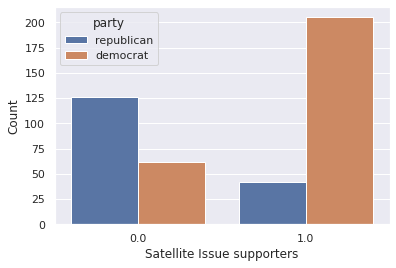

In [117]:
sns.set()
sns.countplot(x='satellite', hue='party', data=df)
plt.xlabel('Satellite Issue supporters')
plt.ylabel('Count')
plt.show()

## Prepare Training Set
- Split and extract Train/Test sets 

In [118]:
# prepare training data
y = df['party'].values
X = df.drop('party', axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=21, test_size=0.3, stratify=y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(304, 16) (304,)
(131, 16) (131,)


## Classification

In [0]:
# Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors=4)

### Training the model

In [120]:
# Train classifier
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

### Testing the model

In [121]:
# Evaluate model on test set
y_pred = knn.predict(X_test)
print("Test predictions: {}".format(y_pred))

Test predictions: ['democrat' 'republican' 'republican' 'democrat' 'democrat' 'democrat'
 'republican' 'republican' 'democrat' 'republican' 'democrat' 'republican'
 'democrat' 'democrat' 'republican' 'democrat' 'democrat' 'republican'
 'democrat' 'democrat' 'republican' 'democrat' 'democrat' 'republican'
 'democrat' 'republican' 'democrat' 'republican' 'republican' 'republican'
 'republican' 'republican' 'democrat' 'republican' 'democrat' 'republican'
 'democrat' 'democrat' 'democrat' 'democrat' 'democrat' 'republican'
 'democrat' 'democrat' 'republican' 'republican' 'democrat' 'republican'
 'republican' 'republican' 'democrat' 'republican' 'democrat' 'democrat'
 'democrat' 'democrat' 'democrat' 'democrat' 'republican' 'democrat'
 'democrat' 'democrat' 'democrat' 'democrat' 'democrat' 'republican'
 'democrat' 'republican' 'republican' 'democrat' 'republican' 'democrat'
 'democrat' 'democrat' 'democrat' 'republican' 'republican' 'democrat'
 'democrat' 'democrat' 'democrat' 'democrat' 'd

### Evaluating model Accuracy


In [122]:
accuracy = knn.score(X_test, y_test)
print("Model accuracy is : {}".format(accuracy))

Model accuracy is : 0.9465648854961832
